In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
clean_df = pd.read_csv("datasets/KaggleV2-May-2016.csv")

# Step 1: Clean column names (as you've done before)
clean_df.rename(columns={
    'No-show': 'Status',
    'Hipertension': 'Hypertension',
    'Handcap': 'Handicap',
    'SMS_received': 'SMS_Received',
    'ScheduledDay': 'ScheduledDate',
    'AppointmentDay': 'AppointmentDate'
}, inplace=True)

# Step 2: Convert to datetime
clean_df['ScheduledDate'] = pd.to_datetime(clean_df['ScheduledDate'])
clean_df['AppointmentDate'] = pd.to_datetime(clean_df['AppointmentDate'])

# Step 3: Create WaitingDays
clean_df['WaitingDays'] = (clean_df['AppointmentDate'] - clean_df['ScheduledDate']).dt.days
clean_df['WaitingDays'] = clean_df['WaitingDays'].abs()
# In original: 'No' means showed up, 'Yes' means missed
clean_df['Status'] = clean_df['Status'].map({'No': 1, 'Yes': 0})

clean_df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,Status,WaitingDays
100968,9.354666e+14,5769832,M,2016-06-03 09:20:57+00:00,2016-06-03 00:00:00+00:00,20,JOANA D´ARC,1,0,0,0,0,0,1,1
44898,4.567163e+13,5696386,F,2016-05-13 13:00:37+00:00,2016-05-13 00:00:00+00:00,27,TABUAZEIRO,0,0,0,0,0,0,1,1
1754,4.749163e+13,5640291,F,2016-04-29 10:27:36+00:00,2016-04-29 00:00:00+00:00,38,SÃO BENEDITO,1,0,0,1,0,0,1,1
39450,7.417389e+14,5657116,F,2016-05-04 08:54:50+00:00,2016-05-11 00:00:00+00:00,37,ROMÃO,0,0,0,0,0,1,0,6
92256,6.545425e+14,5755332,F,2016-06-01 07:17:30+00:00,2016-06-01 00:00:00+00:00,58,CONSOLAÇÃO,1,1,0,0,0,0,1,1


In [3]:
# Show percentage
print(clean_df['Status'].value_counts(normalize=True) * 100)

clean_df['DayOfWeek'] = clean_df['AppointmentDate'].dt.day_name()
clean_df.sample(5)

Status
1    79.806744
0    20.193256
Name: proportion, dtype: float64


,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,Status,WaitingDays,DayOfWeek
48043,1.412775e+13,5649616,F,2016-05-03 07:05:40+00:00,2016-05-05 00:00:00+00:00,73,JARDIM CAMBURI,0,0,0,0,0,0,1,1,Thursday
33002,9.995994e+13,5659654,M,2016-05-04 14:25:02+00:00,2016-05-04 00:00:00+00:00,3,MARIA ORTIZ,0,0,0,0,0,0,1,1,Wednesday
100334,3.715699e+11,5765125,M,2016-06-02 11:41:47+00:00,2016-06-03 00:00:00+00:00,73,CENTRO,0,1,1,0,0,0,1,0,Friday
76354,8.972274e+13,5663977,M,2016-05-05 10:52:39+00:00,2016-05-30 00:00:00+00:00,51,ANDORINHAS,0,1,0,0,0,1,0,24,Monday
22227,4.731615e+13,5692147,F,2016-05-12 14:33:02+00:00,2016-05-16 00:00:00+00:00,54,RESISTÊNCIA,0,0,0,0,0,0,1,3,Monday


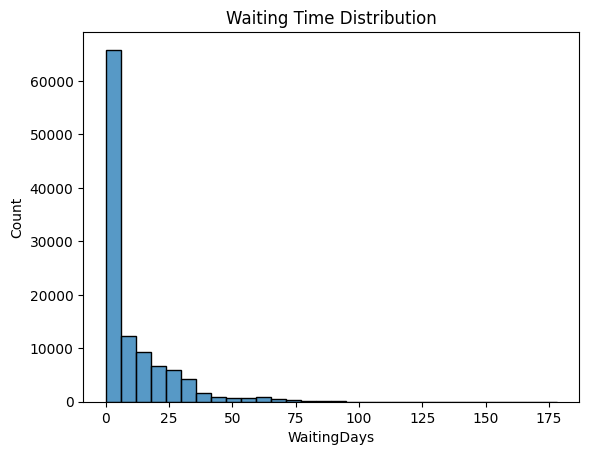

In [4]:
sns.histplot(clean_df['WaitingDays'], bins=30)
plt.title('Waiting Time Distribution')
plt.show()

In [5]:
for col in ['ScheduledDate', 'AppointmentDate']:
    clean_df[f'{col}_year'] = clean_df[col].dt.year
    clean_df[f'{col}_month'] = clean_df[col].dt.month
    clean_df[f'{col}_day'] = clean_df[col].dt.day

clean_df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,SMS_Received,Status,WaitingDays,DayOfWeek,ScheduledDate_year,ScheduledDate_month,ScheduledDate_day,AppointmentDate_year,AppointmentDate_month,AppointmentDate_day
23854,6.769844e+12,5590748,F,2016-04-15 14:53:36+00:00,2016-05-12 00:00:00+00:00,11,CARATOÍRA,0,0,0,...,0,1,26,Thursday,2016,4,15,2016,5,12
107864,8.996672e+14,5562304,F,2016-04-08 13:14:02+00:00,2016-06-01 00:00:00+00:00,77,DE LOURDES,0,1,1,...,0,0,53,Wednesday,2016,4,8,2016,6,1
81899,3.939785e+13,5589221,F,2016-04-15 11:19:32+00:00,2016-05-09 00:00:00+00:00,66,ITARARÉ,0,0,0,...,0,1,23,Monday,2016,4,15,2016,5,9
75158,6.288164e+13,5716996,F,2016-05-19 07:25:54+00:00,2016-05-19 00:00:00+00:00,57,NOVA PALESTINA,0,0,0,...,0,1,1,Thursday,2016,5,19,2016,5,19
76130,2.561946e+13,5741740,F,2016-05-30 07:23:00+00:00,2016-05-30 00:00:00+00:00,39,SÃO PEDRO,1,0,0,...,0,1,1,Monday,2016,5,30,2016,5,30


In [6]:

clean_df['ScheduledDate_hour'] = clean_df['ScheduledDate'].dt.hour
clean_df['ScheduledDate_minute'] = clean_df['ScheduledDate'].dt.minute
clean_df['ScheduledDate_second'] = clean_df['ScheduledDate'].dt.second

clean_df.head()

,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,DayOfWeek,ScheduledDate_year,ScheduledDate_month,ScheduledDate_day,AppointmentDate_year,AppointmentDate_month,AppointmentDate_day,ScheduledDate_hour,ScheduledDate_minute,ScheduledDate_second
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,Friday,2016,4,29,2016,4,29,18,38,8
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,Friday,2016,4,29,2016,4,29,16,8,27
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,Friday,2016,4,29,2016,4,29,16,19,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,Friday,2016,4,29,2016,4,29,17,29,31
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,Friday,2016,4,29,2016,4,29,16,7,23


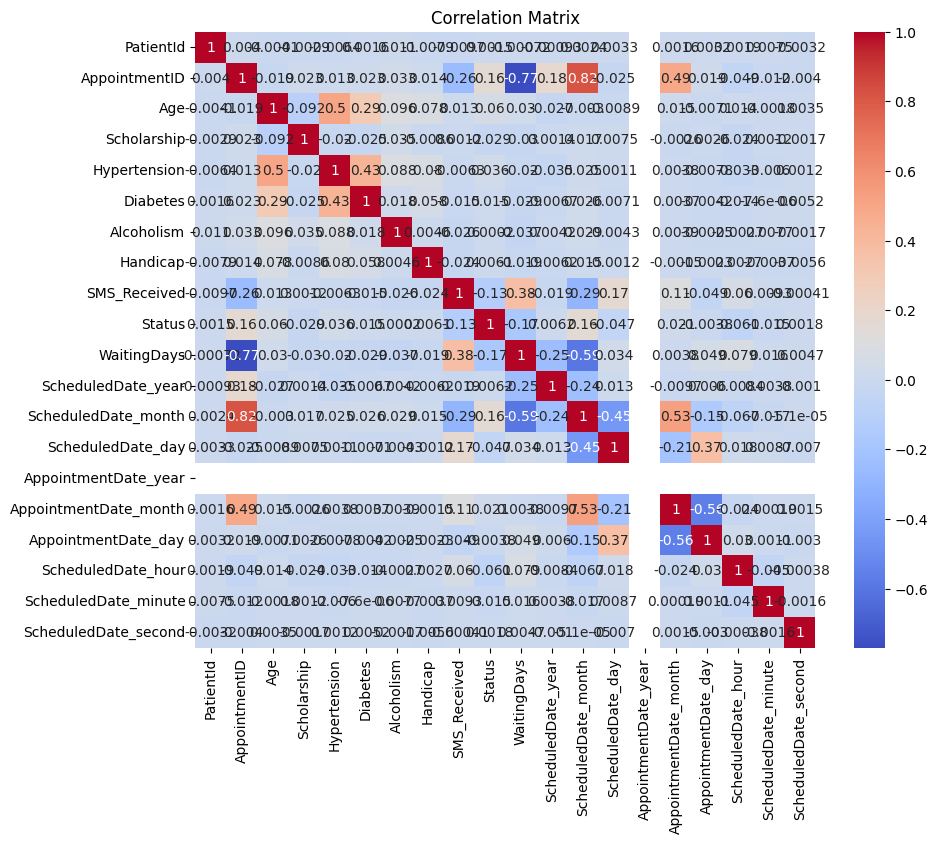

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(clean_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [8]:
clean_df.corr(numeric_only=True)

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,Status,WaitingDays,ScheduledDate_year,ScheduledDate_month,ScheduledDate_day,AppointmentDate_year,AppointmentDate_month,AppointmentDate_day,ScheduledDate_hour,ScheduledDate_minute,ScheduledDate_second
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749,0.001461,-0.000722,-0.000934,0.002404,0.003318,NaN,0.001613,0.003216,0.001927,0.007483,-0.003218
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618,0.162602,-0.769909,0.177429,0.817793,-0.025391,NaN,0.489976,0.018536,-0.049355,-0.011850,-0.004024
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,0.060319,0.030494,-0.026777,-0.003040,-0.008919,NaN,0.014547,-0.007110,0.014151,-0.001750,0.003475
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,-0.029135,-0.029692,0.001402,0.016812,0.007498,NaN,-0.002588,0.002611,-0.024392,0.001241,-0.001723
Hypertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,0.035701,-0.020309,-0.035310,0.024992,0.001054,NaN,0.003779,-0.007784,-0.033222,-0.005968,0.001234
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,0.015180,-0.028977,-0.006724,0.025596,-0.007060,NaN,0.003741,-0.004235,-0.014411,-0.000008,0.005199
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,0.000196,-0.037071,0.004195,0.028771,-0.004254,NaN,0.003920,-0.002525,-0.002710,0.007739,-0.001684
Handicap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,0.006076,-0.019213,-0.006199,0.014953,-0.001206,NaN,-0.001479,-0.002332,0.002672,-0.003717,-0.005573
SMS_Received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,-0.126431,0.377638,-0.018903,-0.294089,0.172580,NaN,0.108070,-0.049429,0.060313,0.009267,-0.000410
Status,0.001461,0.162602,0.060319,-0.029135,0.035701,0.015180,0.000196,0.006076,-0.126431,1.000000,-0.173589,0.006168,0.160862,-0.046557,NaN,0.020886,-0.003763,-0.060697,-0.015037,0.001837


### Observations from Correlation Matrix:
1. High Correlation Features (stronger signal for model):

- `ScheduledDate_month` → `Status`: +0.16
- `SMS_Received` → `Status`: −0.12
- `WaitingDays` → `Status`: −0.17

2. Weak or No Correlation (possibly noise):

- `ScheduledDate_second`, `ScheduledDate_minute`, and `AppointmentDate_day` have very low correlation values.

3. Missing Values in AppointmentDate_year:

That's because all appointments are in 2016 → year has only 1 unique value, so correlation with anything is undefined (NaN).

You can drop `AppointmentDate_year` since it's not informative.

In [9]:
# Drop irrelevant/low-signal features
clean_df = clean_df.drop(columns=[
    'PatientId', 'AppointmentID',
    'AppointmentDate_year'
])


In [10]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Gender']
le = LabelEncoder()

for col in label_cols:
    clean_df[col] = le.fit_transform(clean_df[col])

# 3. One-hot Encode Multiclass Categorical Features
clean_df = pd.get_dummies(clean_df, columns=['DayOfWeek'], drop_first=True)

clean_df['Gender'].head()

0    0
1    1
2    0
3    0
4    0
Name: Gender, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Final features
X = clean_df.drop(columns=['Status', 'Neighbourhood', 'ScheduledDate', 'AppointmentDate', 'ScheduledDate_year'])  # Drop date/datetime
y = clean_df['Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [12]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test, top_n=15):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🧠 {name} Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Feature Importance or Coefficients
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    elif hasattr(model, "coef_"):
        importances = model.coef_[0]
    else:
        print("No feature importance or coefficients found.")
        return

    indices = np.argsort(importances)[::-1]
    features = X_train.columns[indices]
    scores = importances[indices]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(features[:top_n][::-1], scores[:top_n][::-1], color='salmon')
    plt.title(f"{name} - Top {top_n} Feature Importances")
    plt.xlabel("Importance Score" if hasattr(model, "feature_importances_") else "Coefficient")
    plt.tight_layout()
    plt.show()
    for f, imp in zip(features, scores):
        print(f"{f}: {imp:.4f}")


🧠 Random Forest Accuracy: 0.7999
Confusion Matrix:


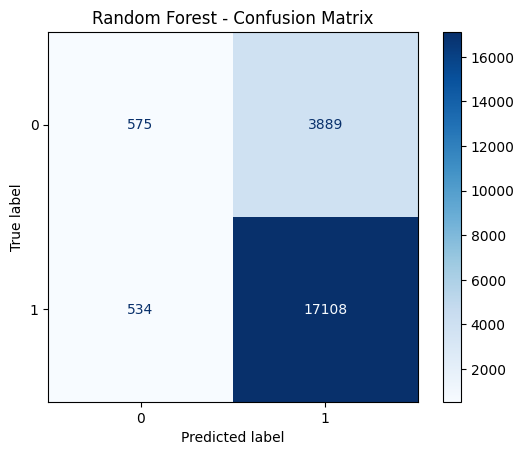

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.13      0.21      4464
           1       0.81      0.97      0.89     17642

    accuracy                           0.80     22106
   macro avg       0.67      0.55      0.55     22106
weighted avg       0.75      0.80      0.75     22106



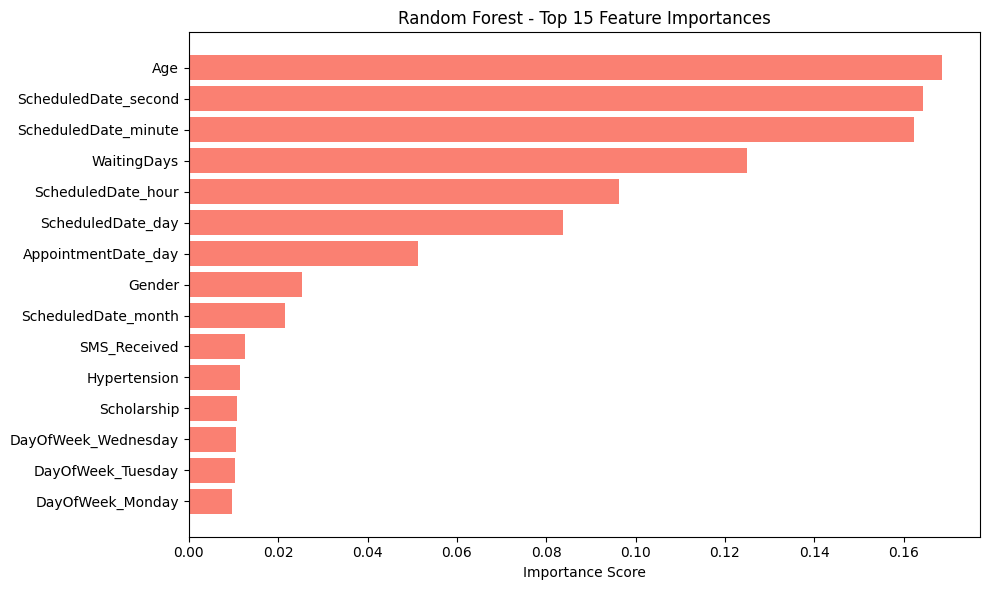

Age: 0.1687
ScheduledDate_second: 0.1642
ScheduledDate_minute: 0.1623
WaitingDays: 0.1249
ScheduledDate_hour: 0.0962
ScheduledDate_day: 0.0837
AppointmentDate_day: 0.0512
Gender: 0.0253
ScheduledDate_month: 0.0215
SMS_Received: 0.0126
Hypertension: 0.0114
Scholarship: 0.0108
DayOfWeek_Wednesday: 0.0105
DayOfWeek_Tuesday: 0.0103
DayOfWeek_Monday: 0.0097
DayOfWeek_Thursday: 0.0089
Diabetes: 0.0083
AppointmentDate_month: 0.0076
Alcoholism: 0.0063
Handicap: 0.0055
DayOfWeek_Saturday: 0.0002


In [13]:
rf = RandomForestClassifier(random_state=42)
evaluate_model("Random Forest", rf, X_train, X_test, y_train, y_test)



🧠 Gradient Boosting Accuracy: 0.7982
Confusion Matrix:


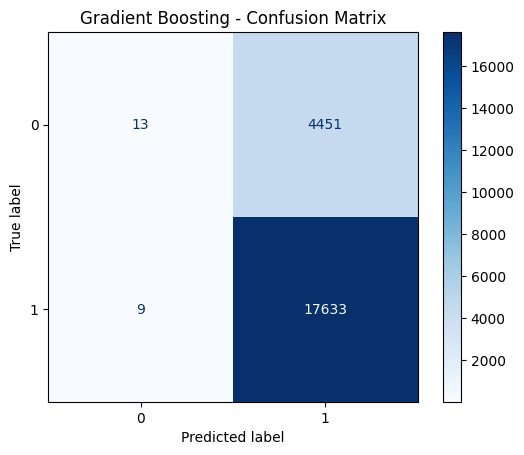

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.00      0.01      4464
           1       0.80      1.00      0.89     17642

    accuracy                           0.80     22106
   macro avg       0.69      0.50      0.45     22106
weighted avg       0.76      0.80      0.71     22106



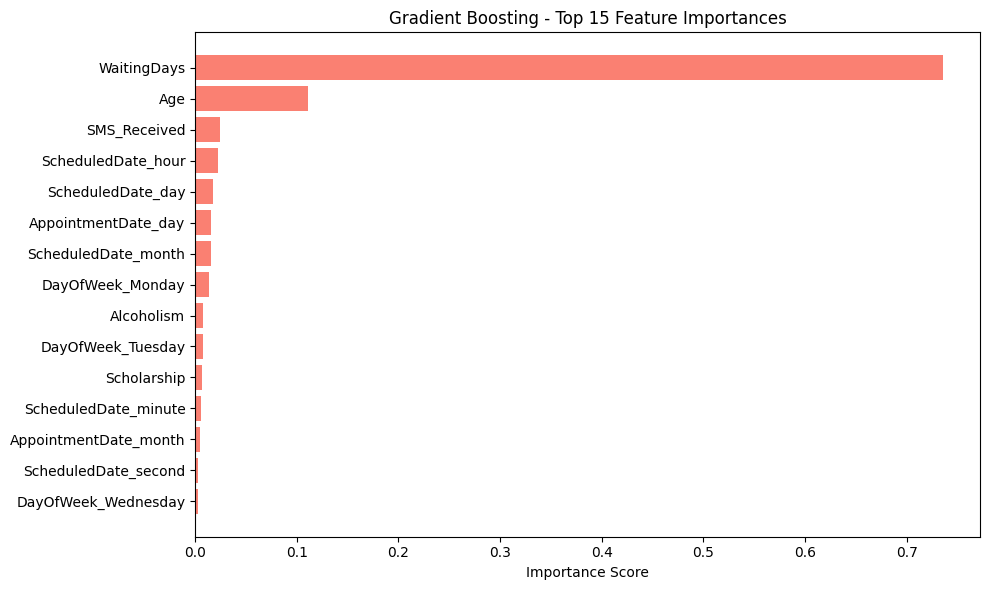

WaitingDays: 0.7355
Age: 0.1113
SMS_Received: 0.0247
ScheduledDate_hour: 0.0226
ScheduledDate_day: 0.0177
AppointmentDate_day: 0.0156
ScheduledDate_month: 0.0154
DayOfWeek_Monday: 0.0138
Alcoholism: 0.0073
DayOfWeek_Tuesday: 0.0072
Scholarship: 0.0071
ScheduledDate_minute: 0.0060
AppointmentDate_month: 0.0043
ScheduledDate_second: 0.0028
DayOfWeek_Wednesday: 0.0028
Gender: 0.0019
Diabetes: 0.0017
Handicap: 0.0012
Hypertension: 0.0007
DayOfWeek_Thursday: 0.0005
DayOfWeek_Saturday: 0.0000


In [14]:
gb = GradientBoostingClassifier(random_state=42)
evaluate_model("Gradient Boosting", gb, X_train, X_test, y_train, y_test)


/Users/apple/Documents/laiba/Apps/Jupyter-venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🧠 Logistic Regression Accuracy: 0.7975
Confusion Matrix:


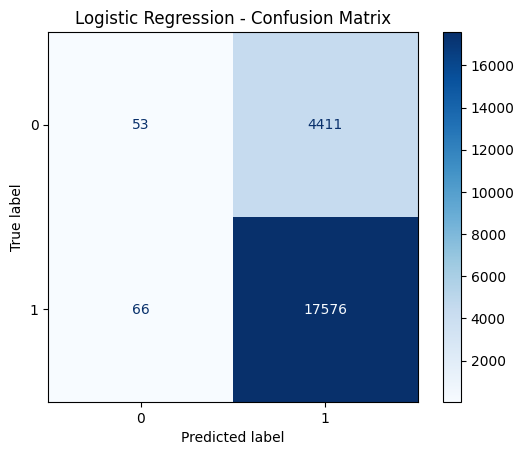

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.01      0.02      4464
           1       0.80      1.00      0.89     17642

    accuracy                           0.80     22106
   macro avg       0.62      0.50      0.46     22106
weighted avg       0.73      0.80      0.71     22106



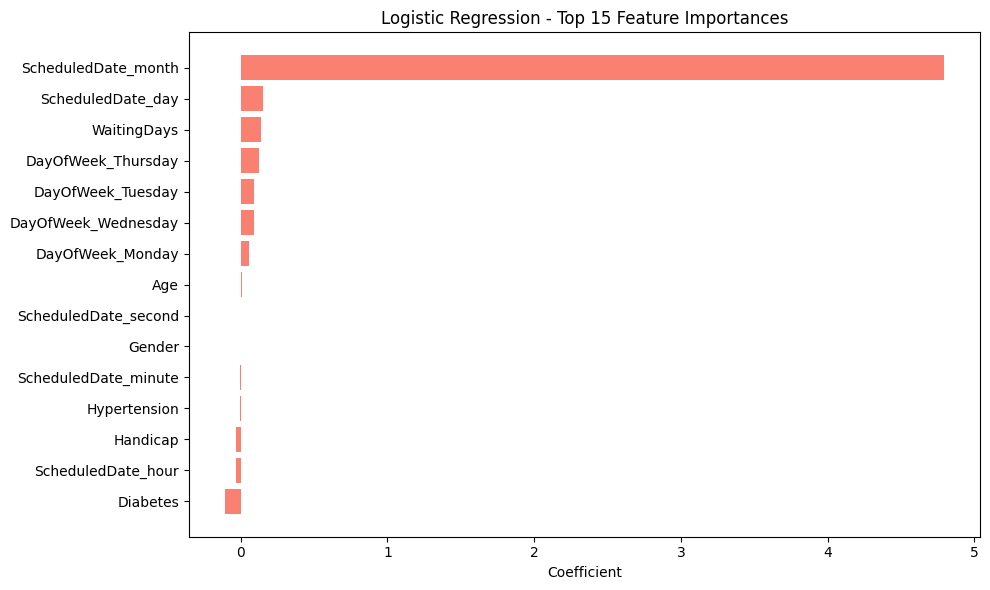

ScheduledDate_month: 4.7928
ScheduledDate_day: 0.1498
WaitingDays: 0.1372
DayOfWeek_Thursday: 0.1260
DayOfWeek_Tuesday: 0.0912
DayOfWeek_Wednesday: 0.0885
DayOfWeek_Monday: 0.0552
Age: 0.0079
ScheduledDate_second: 0.0006
Gender: -0.0010
ScheduledDate_minute: -0.0014
Hypertension: -0.0060
Handicap: -0.0322
ScheduledDate_hour: -0.0327
Diabetes: -0.1080
AppointmentDate_day: -0.1484
Alcoholism: -0.2257
Scholarship: -0.2258
SMS_Received: -0.2446
DayOfWeek_Saturday: -0.2587
AppointmentDate_month: -4.6130


In [15]:
lr = LogisticRegression(max_iter=1000)
evaluate_model("Logistic Regression", lr, X_train, X_test, y_train, y_test)



### Model Comparison Summary

| Model                   | Accuracy | Precision (Class 0) | Recall (Class 0) | F1-score (Class 0) | Precision (Class 1) | Recall (Class 1) | F1-score (Class 1) |
| ----------------------- | -------- | ------------------- | ---------------- | ------------------ | ------------------- | ---------------- | ------------------ |
| **Random Forest**       | 0.8005   | 0.52                | 0.13             | 0.20               | 0.81                | 0.97             | 0.89               |
| **Gradient Boosting**   | 0.7982   | 0.57                | 0.00             | 0.01               | 0.80                | 1.00             | 0.89               |
| **Logistic Regression** | 0.7975   | 0.44                | 0.01             | 0.02               | 0.80                | 1.00             | 0.89               |


#### Observations:
- All models favor class 1 heavily (high recall/f1 for 1, poor performance on class 0).
- Class imbalance is severely impacting performance on class 0.
- Random Forest is the only one capturing class 0 a little (13% recall, 20% f1), though still weak.


### Feature Importance Summary
**Random Forest – Top Features**
- Age, ScheduledDate_second/minute/hour/day, WaitingDays, AppointmentDate_day

**Gradient Boosting – Top Features**
- WaitingDays (most dominant), Age, SMS_Received, ScheduledDate_hour/day

**Logistic Regression – Top Coefficients (absolute)**

ScheduledDate_month (5.3), AppointmentDate_month (-5.2), SMS_Received (-0.22), Scholarship (-0.22)


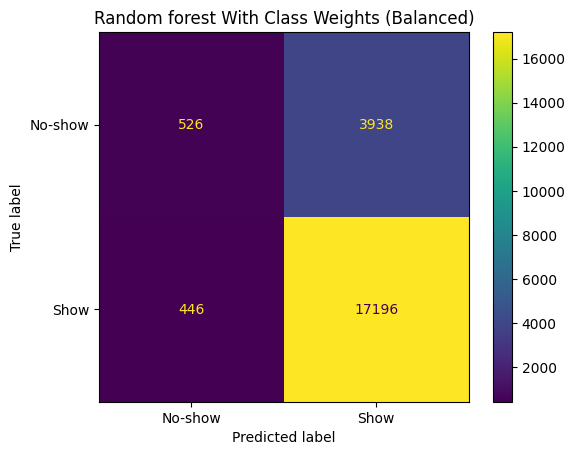

              precision    recall  f1-score   support

           0       0.54      0.12      0.19      4464
           1       0.81      0.97      0.89     17642

    accuracy                           0.80     22106
   macro avg       0.68      0.55      0.54     22106
weighted avg       0.76      0.80      0.75     22106



In [20]:

rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_balanced.fit(X_train, y_train)
y_pred_balanced = rf_balanced.predict(X_test)

cm_bal = confusion_matrix(y_test, y_pred_balanced)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bal, display_labels=["No-show", "Show"])
disp.plot()
plt.title("Random forest With Class Weights (Balanced)")
plt.show()

print(classification_report(y_test, y_pred_balanced))


🧠 Gradient Boosting Accuracy: 0.7982
Confusion Matrix:


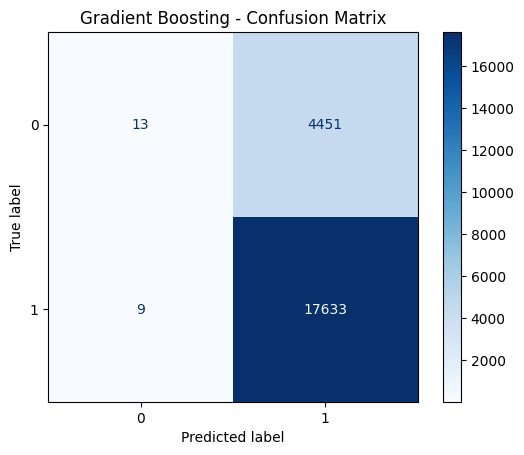

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.00      0.01      4464
           1       0.80      1.00      0.89     17642

    accuracy                           0.80     22106
   macro avg       0.69      0.50      0.45     22106
weighted avg       0.76      0.80      0.71     22106



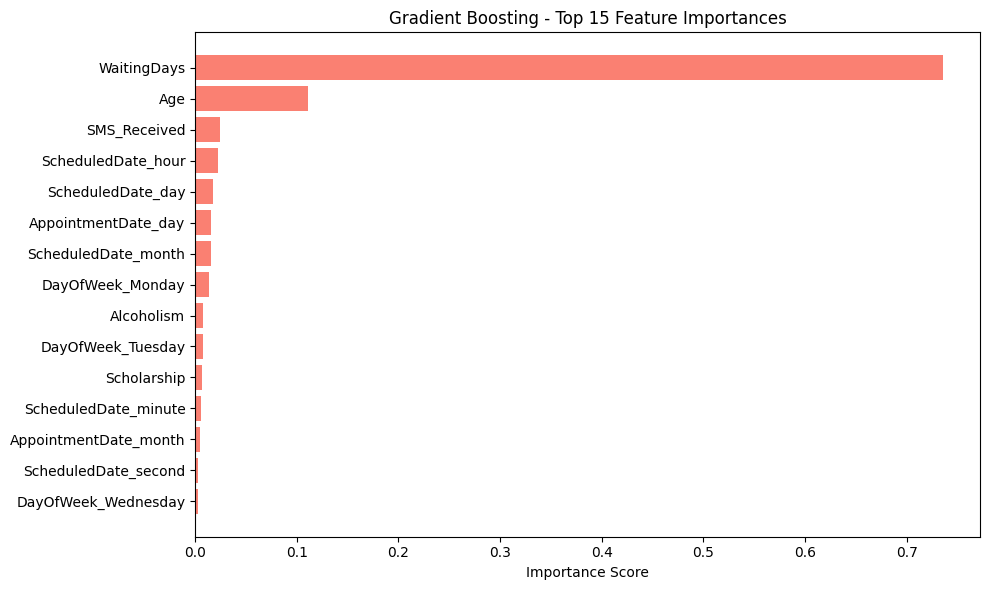

WaitingDays: 0.7355
Age: 0.1113
SMS_Received: 0.0247
ScheduledDate_hour: 0.0226
ScheduledDate_day: 0.0177
AppointmentDate_day: 0.0156
ScheduledDate_month: 0.0154
DayOfWeek_Monday: 0.0138
Alcoholism: 0.0073
DayOfWeek_Tuesday: 0.0072
Scholarship: 0.0071
ScheduledDate_minute: 0.0060
AppointmentDate_month: 0.0043
ScheduledDate_second: 0.0028
DayOfWeek_Wednesday: 0.0028
Gender: 0.0019
Diabetes: 0.0017
Handicap: 0.0012
Hypertension: 0.0007
DayOfWeek_Thursday: 0.0005
DayOfWeek_Saturday: 0.0000


In [21]:
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
gb_bl = GradientBoostingClassifier(random_state=42)
gb_bl.fit(X_train, y_train, sample_weight=sample_weights)

evaluate_model("Gradient Boosting", gb_bl, X_train, X_test, y_train, y_test)


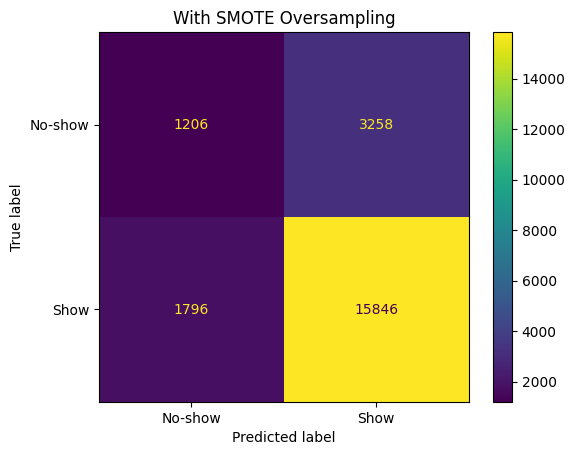

              precision    recall  f1-score   support

           0       0.40      0.27      0.32      4464
           1       0.83      0.90      0.86     17642

    accuracy                           0.77     22106
   macro avg       0.62      0.58      0.59     22106
weighted avg       0.74      0.77      0.75     22106



In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train again
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_res, y_train_res)
y_pred_smote = rf_smote.predict(X_test)

cm_smote = confusion_matrix(y_test, y_pred_smote)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=["No-show", "Show"])
disp.plot()
plt.title("With SMOTE Oversampling")
plt.show()

print(classification_report(y_test, y_pred_smote))

In [24]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc

# ROC Curve
def plot_roc(model, X_test, y_test):
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC AUC = {:.2f}'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Precision-Recall Curve
def plot_pr(model, X_test, y_test):
    y_proba = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    plt.figure()
    plt.plot(recall, precision, label='PR AUC = {:.2f}'.format(pr_auc))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()



Random Forest (class_weight='balanced') Evaluation:



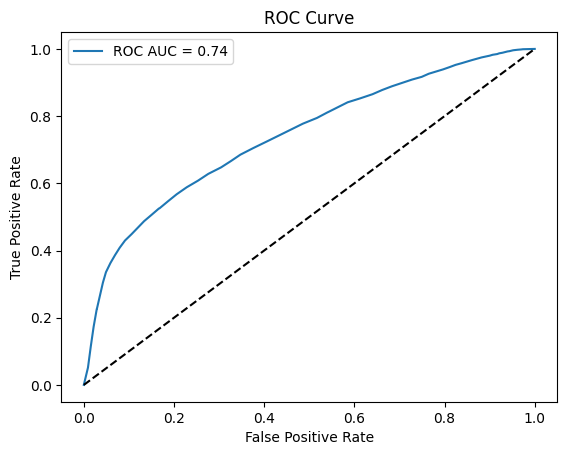

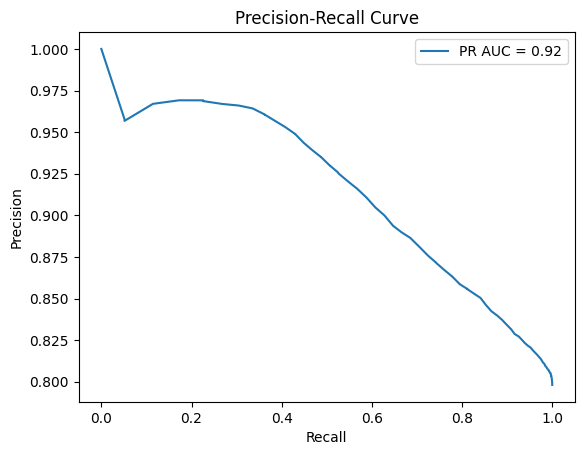

In [25]:
# ROC and PR Curve for Random Forest (Balanced)
print("Random Forest (class_weight='balanced') Evaluation:\n")
plot_roc(rf_balanced, X_test, y_test)
plot_pr(rf_balanced, X_test, y_test)


Gradient Boosting (sample_weight) Evaluation:



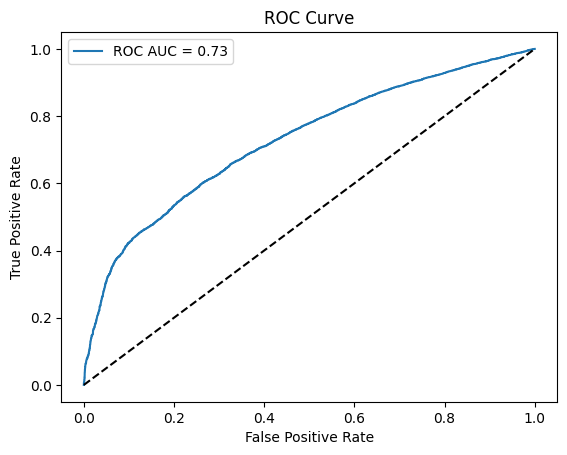

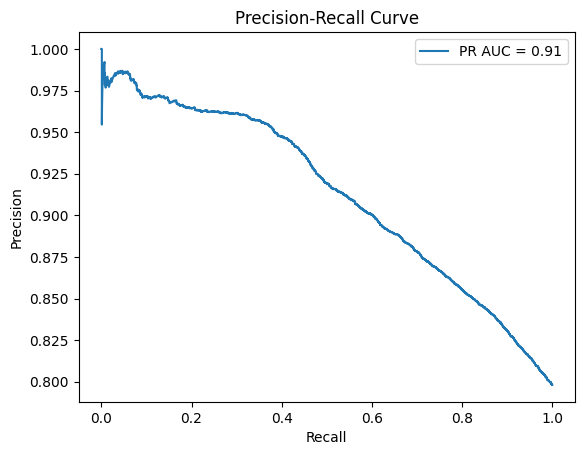

In [26]:
# ROC and PR Curve for Gradient Boosting (Sample Weights)
print("Gradient Boosting (sample_weight) Evaluation:\n")
plot_roc(gb_bl, X_test, y_test)
plot_pr(gb_bl, X_test, y_test)


Random Forest with SMOTE Oversampling Evaluation:



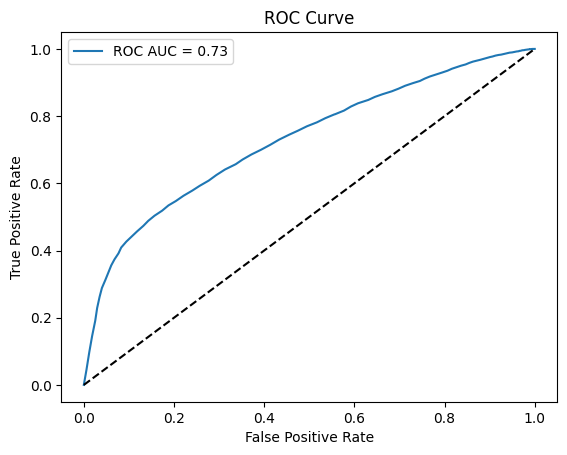

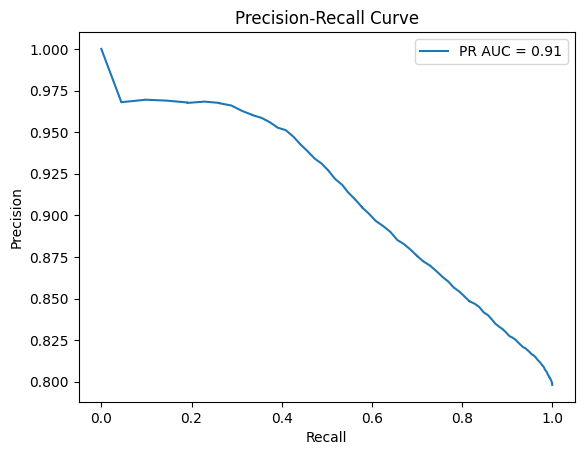

In [27]:
print("Random Forest with SMOTE Oversampling Evaluation:\n")
plot_roc(rf_smote, X_test, y_test)
plot_pr(rf_smote, X_test, y_test)


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE


ModuleNotFoundError: No module named 'tensorflow'